### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [24]:
tf.__version__

'1.14.0'

### Collect Data

In [2]:
import keras

Using TensorFlow backend.


In [3]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [4]:
print(testY[0:5])

[9 2 1 1 6]


In [5]:
print(trainX[0].shape)

(28, 28)


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
testY = tf.keras.utils.to_categorical(testY)
trainY = tf.keras.utils.to_categorical(trainY)

In [7]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
import numpy as np
import matplotlib.pyplot as plt


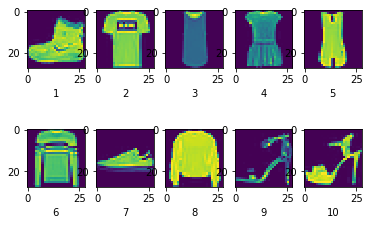

In [9]:
for i in range(1,11) :
  plt.subplot(2,5,i)
  plt.xlabel(i)
  plt.imshow(trainX[i-1])

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
model = tf.keras.Sequential()

In [0]:
#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [15]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

W0929 10:18:30.369407 139630046349184 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

### Execute the model using model.fit()

In [17]:
model.fit(trainX,trainY,epochs=40)

Epoch 1/40
60000/60000 [==============================] - 2s 39us/sample - loss: 2073.8724 - acc: 0.7387
Epoch 2/40
60000/60000 [==============================] - 2s 34us/sample - loss: 1617.1122 - acc: 0.7777
Epoch 3/40
60000/60000 [==============================] - 2s 33us/sample - loss: 1545.1288 - acc: 0.7875
Epoch 4/40
60000/60000 [==============================] - 2s 33us/sample - loss: 1534.2490 - acc: 0.7889
Epoch 5/40
60000/60000 [==============================] - 2s 34us/sample - loss: 1478.8232 - acc: 0.7915
Epoch 6/40
60000/60000 [==============================] - 2s 34us/sample - loss: 1474.6922 - acc: 0.7943
Epoch 7/40
60000/60000 [==============================] - 2s 33us/sample - loss: 1456.7254 - acc: 0.7966
Epoch 8/40
60000/60000 [==============================] - 2s 34us/sample - loss: 1411.5937 - acc: 0.8008
Epoch 9/40
60000/60000 [==============================] - 2s 34us/sample - loss: 1438.4098 - acc: 0.7986
Epoch 10/40
60000/60000 [==============================

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(10,activation='softmax'))
model2.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [32]:
model2.fit(trainX,trainY,epochs=40,batch_size=30)

Epoch 1/40
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5955 - acc: 0.7967
Epoch 2/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4919 - acc: 0.8296
Epoch 3/40
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4684 - acc: 0.8378
Epoch 4/40
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4561 - acc: 0.8436
Epoch 5/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4493 - acc: 0.8444
Epoch 6/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4426 - acc: 0.8475
Epoch 7/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4387 - acc: 0.8482
Epoch 8/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4373 - acc: 0.8491
Epoch 9/40
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4328 - acc: 0.8514
Epoch 10/40
60000/60000 [==============================] - 3s 55us/sample - loss: 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
from keras import optimizers

In [0]:
sgd = optimizers.SGD(lr=0.001)

In [0]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Dense(10,activation='softmax'))
model3.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model3.fit(trainX,trainY,batch_size=30,epochs=40)

Epoch 1/40
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4921 - acc: 0.8310
Epoch 2/40
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4702 - acc: 0.8389
Epoch 3/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4609 - acc: 0.8410
Epoch 4/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4513 - acc: 0.8437
Epoch 5/40
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4448 - acc: 0.8445
Epoch 6/40
60000/60000 [==============================] - 3s 54us/sample - loss: 0.4421 - acc: 0.8456
Epoch 7/40
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4394 - acc: 0.8474
Epoch 8/40
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4374 - acc: 0.8477
Epoch 9/40
60000/60000 [==============================] - 3s 50us/sample - loss: 0.4311 - acc: 0.8506
Epoch 10/40
60000/60000 [==============================] - 3s 50us/sample - loss: 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model4.add(tf.keras.layers.BatchNormalization())


In [0]:
model4.add(tf.keras.layers.Dense(100,activation='sigmoid'))


In [0]:
model4.add(tf.keras.layers.Dense(100,activation='sigmoid'))


In [0]:
model4.add(tf.keras.layers.Dense(10,activation='softmax'))


In [0]:
sgd = optimizers.SGD(lr=0.03)
model4.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

## Review model

In [40]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [41]:
model4.fit(trainX,trainY,batch_size=30,epochs=40)

Epoch 1/40
60000/60000 [==============================] - 6s 92us/sample - loss: 1.5227 - acc: 0.5975
Epoch 2/40
60000/60000 [==============================] - 6s 94us/sample - loss: 0.8466 - acc: 0.7333
Epoch 3/40
60000/60000 [==============================] - 5s 81us/sample - loss: 0.6809 - acc: 0.7631
Epoch 4/40
60000/60000 [==============================] - 5s 80us/sample - loss: 0.6054 - acc: 0.7861
Epoch 5/40
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5571 - acc: 0.8037
Epoch 6/40
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5264 - acc: 0.8128
Epoch 7/40
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5014 - acc: 0.8213
Epoch 8/40
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4818 - acc: 0.8278
Epoch 9/40
60000/60000 [==============================] - 5s 82us/sample - loss: 0.4678 - acc: 0.8335
Epoch 10/40
60000/60000 [==============================] - 5s 84us/sample - loss: 